In [1]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a popular Python library used for creating statistical graphics and visualizations, and it is built on top of the matplotlib library.including scatter plots, line charts, heatmaps, and more
import warnings
warnings.filterwarnings("ignore")#is used to suppress warning messages that are generated by Python during the execution of a program.
%matplotlib inline
from datetime import datetime

In [2]:
# Read in data in excel format
superstore = pd.read_excel(r'G:\My Drive\Analytics\superstore_sales.xlsx')

**Data Exploration**

In [3]:
superstore.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
superstore.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
# Shape of data set
superstore.shape


(51290, 21)

In [6]:
# Summarised information of data set
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

# Data Cleaning

In [7]:
# to check for null values
superstore.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
# Find the number of duplicate data
superstore.duplicated().sum()

0

In [9]:
#creating 'Profit Margin % column
superstore['Profit Margin %'] = round((superstore['profit'] / superstore['sales']) * 100,2)
superstore.head(5)


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Profit Margin %
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,26.00
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,29.94
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,44.83
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,-58.07
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,33.23


# Descriptive Statistics

In [10]:
# Get descriptive statistics summary
superstore.describe(include = "all")


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Profit Margin %
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000,51290.000000
unique,25035,1430,1464,4,795,3,1094,147,7,13,...,17,3788,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,CA-2014-100111,2014-06-18 00:00:00,2014-11-22 00:00:00,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,...,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN
freq,14,135,130,30775,108,26518,2001,9994,11002,11117,...,6152,227,NaN,NaN,NaN,NaN,NaN,29433,NaN,NaN
first,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.490581,3.476545,0.142908,28.641740,26.375818,NaN,2012.777208,4.743878
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,NaN,1.098931,46.566879
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN,2011.000000,-473.350000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000,0.000000


**Some of the categorical columns may contain ‘NaN’ values, but this is not a problem since we don't need to perform calculations on categorical values. Therefore, we can simply ignore them.**

What we need to concentrate on are the unique counts and frequencies of the categorical features, such as:

**There are 4 shipping modes and 3 customer segments.**

Approximately half of the orders are from the Consumer segment using Standard Class shipment.

**The store carries 3 categories of items with 17 sub-categories.
Approximately 60% of orders are for Office Supplies and at least 15% of purchases are for Binders.**

Regarding numerical parameters, it's worth noting that:

**75% of orders have a profit margin of at least 36%.**

**Loss-making orders can result in up to 275% losses. It's crucial to focus on these loss-making sales and cut them off.**
We will now conduct some analyses to verify these observations.

# Exploratory Data Analysis

### 1.Which are the most selling products?

In [11]:
boughts = superstore.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
boughts

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

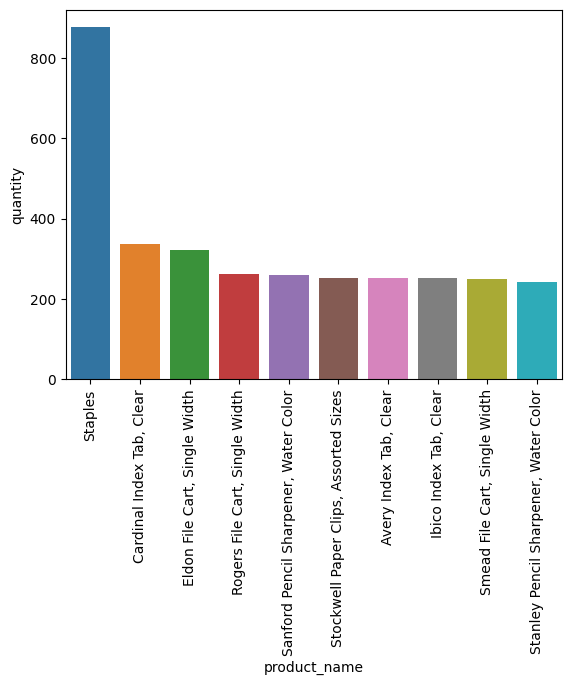

In [12]:
sns.barplot(x='product_name',y='quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

### 2. Which Category is Best Selling and Most Profitable?

In [13]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['category'])[['sales', 'quantity', 'profit']].sum())
category_analysis


,sales,quantity,profit
category,,,
Furniture,4.110874e+06,34954,286782.25380
Office Supplies,3.787070e+06,108182,518473.83430
Technology,4.744557e+06,35176,663778.73318


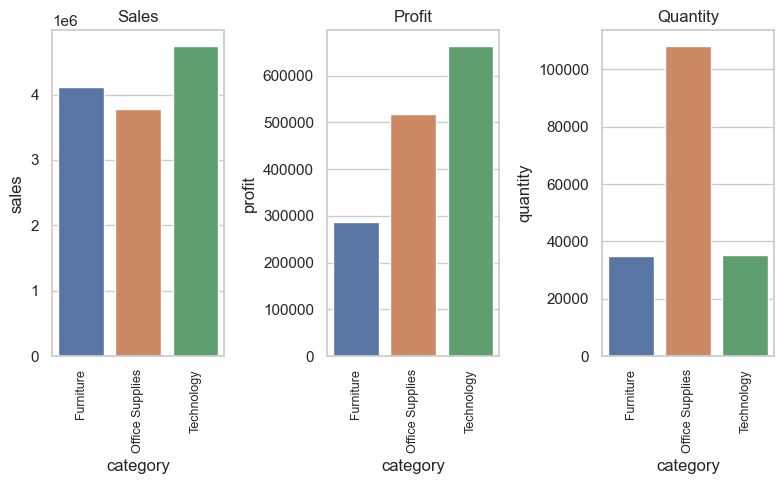

In [14]:
# to create a figure with 3 subplots arranged in a single row.

sns.set_theme(style="whitegrid")# sets the style of the plots using the seaborn library to have a white grid in the background.
figure, axis = plt.subplots(1, 3, figsize=(8, 5))#creates a figure with 1 row and 3 columns of subplots. The figsize argument specifies the dimensions of the figure in inches.
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()


Our observations reveal that all three categories - Furniture, Office Supplies, and Technology - generate similar amounts of sales. However, Technology emerges as the Best Selling category, and it's worth noting that it is also the Most Profitable one. Although only minimal quantity is sold, these products are usually one-off purchases that can last for at least 4-5 years.

In contrast, although Furniture generates similar sales as Technology, it is the least profitable, and the quantity sold is also minimal. On the other hand, Office Supplies sell the most in terms of quantity, owing to their relatively low prices.



In [15]:
result = superstore.groupby(['category']).sum()['sales'].reset_index(name='sales')
result

,category,sales
0,Furniture,4.110874e+06
1,Office Supplies,3.787070e+06
2,Technology,4.744557e+06


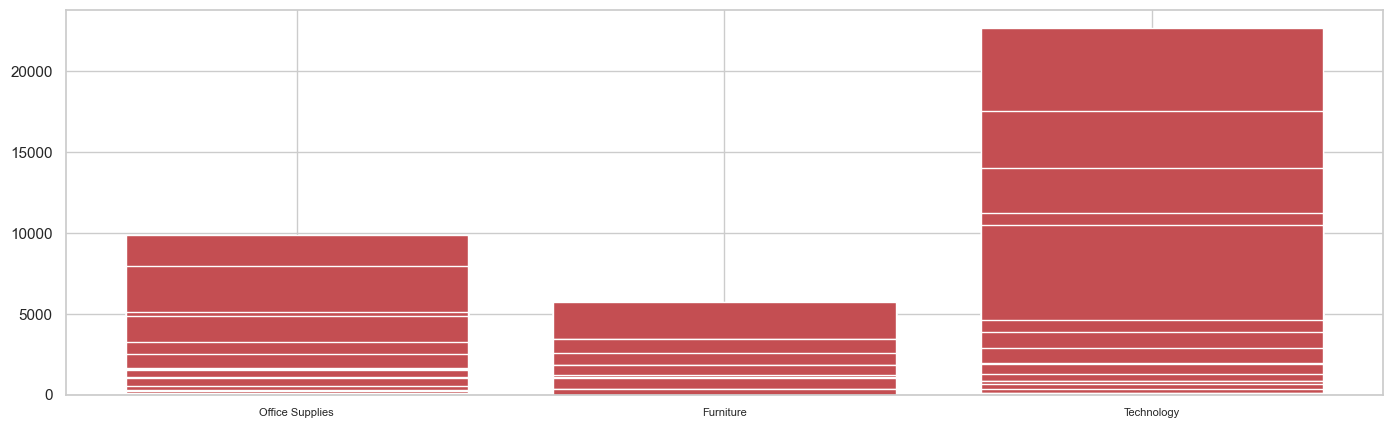

In [16]:
plt.figure(figsize=(17, 5))
sns.set_theme(style="whitegrid")
plt.bar(superstore['category'],superstore['sales'],color='r')
plt.xticks(size=8)
plt.show()

**3.What are the Best Selling and Most Profitable Sub-Category?**

In [17]:
# Group by sub-category
subcat_analysis = pd.DataFrame(superstore.groupby(['sub_category'])[['sales', 'profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('sales', ascending = False))
subcat_sales

,sales,profit
sub_category,,
Phones,1.706824e+06,216717.00580
Copiers,1.509436e+06,258567.54818
Chairs,1.501682e+06,141973.79750
Bookcases,1.466572e+06,161924.41950
Storage,1.127086e+06,108461.48980
Appliances,1.011064e+06,141680.58940
Machines,7.790601e+05,58867.87300
Tables,7.570419e+05,-64083.38870
Accessories,7.492370e+05,129626.30620


In [18]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('profit', ascending = False))
subcat_profit

,sales,profit
sub_category,,
Copiers,1.509436e+06,258567.54818
Phones,1.706824e+06,216717.00580
Bookcases,1.466572e+06,161924.41950
Chairs,1.501682e+06,141973.79750
Appliances,1.011064e+06,141680.58940
Accessories,7.492370e+05,129626.30620
Storage,1.127086e+06,108461.48980
Binders,4.619115e+05,72449.84600
Paper,2.442917e+05,59207.68270


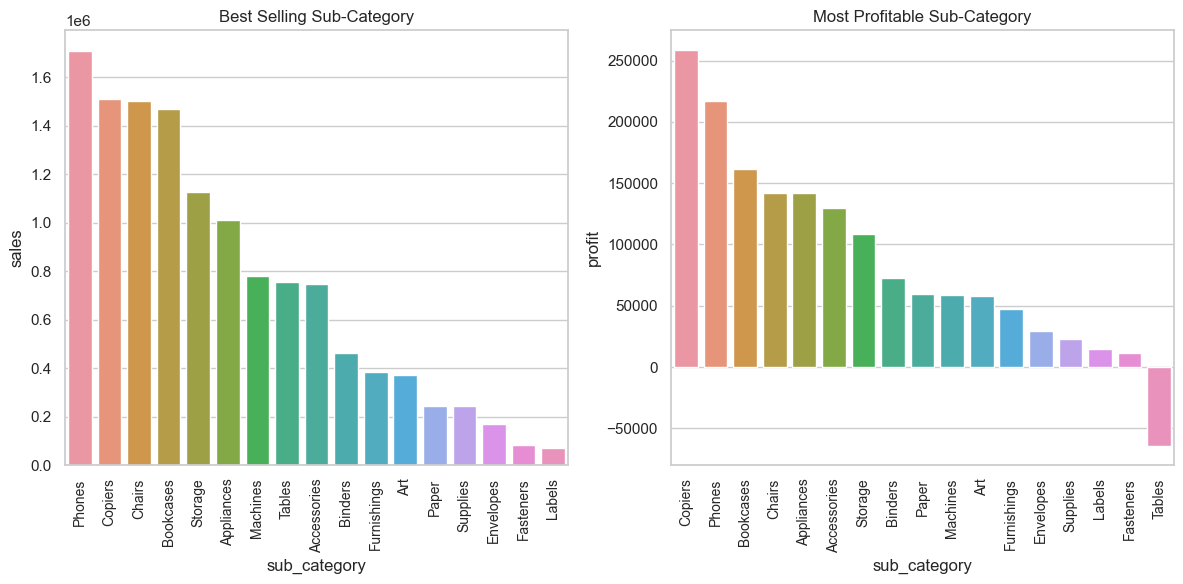

In [19]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()


Let's analyze the bar plots:

The Top 2 best-selling sub-categories are Phones and Chairs. Copiers produce the most profit, followed by Phones, Accessories, Papers, and Binders. Therefore, the marketing strategy should focus on these products.

On the other hand, Machines, Fasteners, Supplies, Bookcases, and Tables generate close to zero margin to losses. Super Store could consider dropping these products from the product catalogue, increasing the sale price and profit margin, or bargaining for a lower price from the supplier.

### 4. Which is the Top Selling Sub-Category?

In [20]:
subcat_quantity = pd.DataFrame(superstore.groupby(['sub_category'])[['quantity']].sum().sort_values('quantity',ascending=False))
subcat_quantity


,quantity
sub_category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


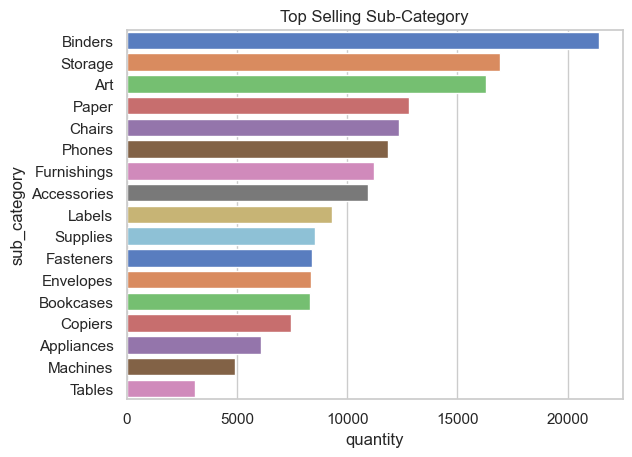

In [21]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.quantity, palette = "muted")# sets the color palette for the plot.
plt.title("Top Selling Sub-Category")
plt.show()

Based on the data analysis, it is recommended that Super Store should ensure that its inventory is always well-stocked for the top selling sub-categories such as Binders, Paper, Furnishings, and Phones. Although Copiers are the most profitable, they have the lowest sales of only 234. However, since Copiers are relatively expensive office equipment that are typically used for several years, it is understandable that they sell the least among all the sub-categories.

**4. Which Customer Segment is Most Profitable?**


In [22]:
#segment_analysis = pd.DataFrame(superstore.groupby(['segment'])[['profit']].sum().apply(lambda x:"{:,.2f}".format(x), axis=1))

#segment_analysis
segment_analysis = pd.DataFrame(superstore.groupby(['segment'])[['profit']].sum())
segment_analysis['profit'] = segment_analysis['profit'].apply(lambda x: "{:,.2f}".format(x)).str.replace(',', '').astype(float)
segment_analysis

,profit
segment,
Consumer,749239.78
Corporate,442785.86
Home Office,277009.18


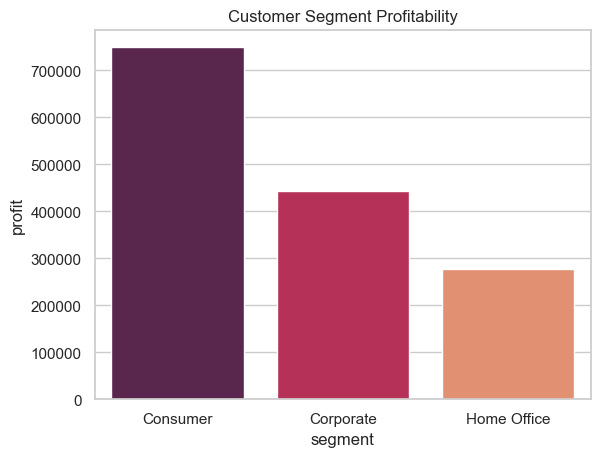

In [23]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

### 5. Which is the Preferred Ship Mode?

In [24]:
superstore['ship_mode'].value_counts().sort_values(ascending=False)[:1]


Standard Class    30775
Name: ship_mode, dtype: int64

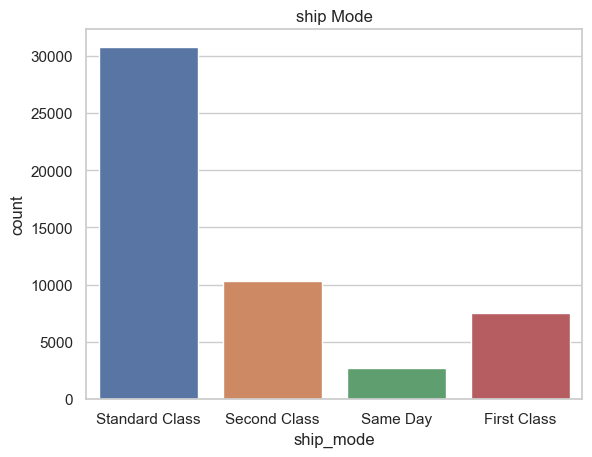

In [25]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(x='ship_mode', data=superstore)
plt.title("ship Mode")
plt.show()

**Which Region is the Most Profitable?**

In [26]:
region_analysis = pd.DataFrame(superstore.groupby(['region'])['profit'].sum().reset_index())
region_analysis

,region,profit
0,Africa,88871.63100
1,Canada,17817.39000
2,Caribbean,34571.32104
3,Central,311403.98164
4,Central Asia,132480.18700
5,EMEA,43897.97100
6,East,91522.78000
7,North,194597.95252
8,North Asia,165578.42100
9,Oceania,121666.64200


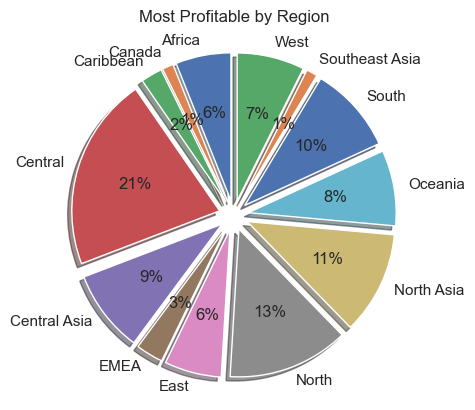

In [27]:
# Plot Pie Chart
# Find the number of slices in the pie chart
num_slices = len(region_analysis.profit)
# Create an explode list of the same length as the number of slices
explode = [0.1] * num_slices
plt.pie(region_analysis.profit, labels = region_analysis.region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

**Which State has the Highest Number of Sales?**

In [30]:
state_sales = pd.DataFrame(superstore.groupby(['state'])['sales', 'quantity'].sum().sort_values('sales',ascending = False))
top10 = state_sales[:10]
top10


,sales,quantity
state,,
England,485170.9710,5656
California,457687.6315,7667
Ile-de-France,317822.5440,3839
New York,310876.2710,4224
New South Wales,270487.1040,2921
Queensland,238312.7340,2665
North Rhine-Westphalia,216451.8510,2660
Texas,170188.0458,3724
San Salvador,153639.3970,2273


In [31]:
bottom10 = state_sales[-10:]
bottom10

,sales,quantity
state,,
Inhambane,23.250,1
Gangwon,22.410,1
Zhambyl,22.050,3
Rize,18.528,1
Edirne,18.528,1
Pernik,14.820,1
Manicaland,11.853,2
Bitola,10.980,1
Kabarole,3.573,1
